# Aula 04 - Exploração e Visualização

Uma parte fundamental do kit de ferramentas do cientista de dados é a visualização de dados. Embora seja muito fácil criar visualizações, é muito mais difícil produzir boas visualizações.

Existem dois usos principais para visualização de dados:

    Para explorar dados;
    Para comunicar dados.

Nesta aula, nos concentraremos em desenvolver as habilidades que você precisará para começar a explorar os seus próprios dados e produzir as visualizações que usaremos ao longo do curso.

Como a maioria dos tópicos que veremos, a visualização de dados é um rico campo de estudo que merece o seu próprio curso.

No entanto, vamos tentar dar uma ideia do que contribui para uma boa visualização e o que não contribui.


## Objetivos

1. Aprender Matplotlib
2. Aprender conceitos básicos de visualizar dados
3. Um pouco mais de filtro e seleção de dados

## Resultado Esperado

1. Junto com a aula passada, ferramentas simples para exploração de dados
1. Muito pode ser feito sem modelos (lembre do John-Snow Experiment)
1. Plots + Filtros!

In [1]:
# -*- coding: utf8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Colocando alguns defaults para embelezar os plots!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

## EDA

Vamos iniciar explorando algumas chamadas sobre como fazer merge e tratar missing data. Alguns passos simples para
a Limpeza de Dados.

In [3]:
people = pd.DataFrame(
    [["Joey",      "blue",       42,  "M"],
     ["Weiwei",    "blue",       50,  "F"],
     ["Joey",      "green",       8,  "M"],
     ["Karina",    "green",  np.nan,  "F"],
     ["Fernando",  "pink",        9,  "M"],
     ["Nhi",       "blue",        3,  "F"],
     ["Sam",       "pink",   np.nan,  "M"]], 
    columns = ["Name", "Color", "Age", "Gender"])
people

,Name,Color,Age,Gender
0,Joey,blue,42.0,M
1,Weiwei,blue,50.0,F
2,Joey,green,8.0,M
3,Karina,green,NaN,F
4,Fernando,pink,9.0,M
5,Nhi,blue,3.0,F
6,Sam,pink,NaN,M


In [4]:
email = pd.DataFrame(
    [["Deb",  "deborah_nolan@berkeley.edu"],
     ["Sam",  np.nan],
     ["John", "doe@nope.com"],
     ["Joey", "jegonzal@cs.berkeley.edu"],
     ["Weiwei", "weiwzhang@berkeley.edu"],
     ["Weiwei", np.nan],
     ["Karina", "kgoot@berkeley.edu"]], 
    columns = ["User Name", "Email"])
email

,User Name,Email
0,Deb,deborah_nolan@berkeley.edu
1,Sam,NaN
2,John,doe@nope.com
3,Joey,jegonzal@cs.berkeley.edu
4,Weiwei,weiwzhang@berkeley.edu
5,Weiwei,NaN
6,Karina,kgoot@berkeley.edu


In [5]:
people.merge(email, 
             how = "inner",
             left_on = "Name", right_on = "User Name")

,Name,Color,Age,Gender,User Name,Email
0,Joey,blue,42.0,M,Joey,jegonzal@cs.berkeley.edu
1,Joey,green,8.0,M,Joey,jegonzal@cs.berkeley.edu
2,Weiwei,blue,50.0,F,Weiwei,weiwzhang@berkeley.edu
3,Weiwei,blue,50.0,F,Weiwei,NaN
4,Karina,green,NaN,F,Karina,kgoot@berkeley.edu
5,Sam,pink,NaN,M,Sam,NaN


Como podemos tratar?

1. Missing data nas cores?
2. Missing data nos e-mails?

In [6]:
people['Age'] = people['Age'].fillna(people['Age'].mean())
people

,Name,Color,Age,Gender
0,Joey,blue,42.0,M
1,Weiwei,blue,50.0,F
2,Joey,green,8.0,M
3,Karina,green,22.4,F
4,Fernando,pink,9.0,M
5,Nhi,blue,3.0,F
6,Sam,pink,22.4,M


In [7]:
email.dropna()

,User Name,Email
0,Deb,deborah_nolan@berkeley.edu
2,John,doe@nope.com
3,Joey,jegonzal@cs.berkeley.edu
4,Weiwei,weiwzhang@berkeley.edu
6,Karina,kgoot@berkeley.edu


Voltando para os dados de nomes.

In [8]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/04-EDA-e-Vis/baby.csv', encoding='iso-8859-1', na_values='unknown')
df

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


In [9]:
cols = ['Year', 'Count']
df[cols]

,Year,Count
0,1910,14
1,1910,12
2,1910,10
3,1910,8
4,1910,7
5,1910,6
6,1910,6
7,1910,5
8,1911,12
9,1911,7


In [10]:
df[cols].groupby('Year').sum()

,Count
Year,
1910,516318
1911,565810
1912,887984
1913,1028553
1914,1293322
1915,1690022
1916,1786510
1917,1855696
1918,2013381


In [11]:
series = df[cols].groupby('Year').sum()

Text(0, 0.5, 'Num Births')

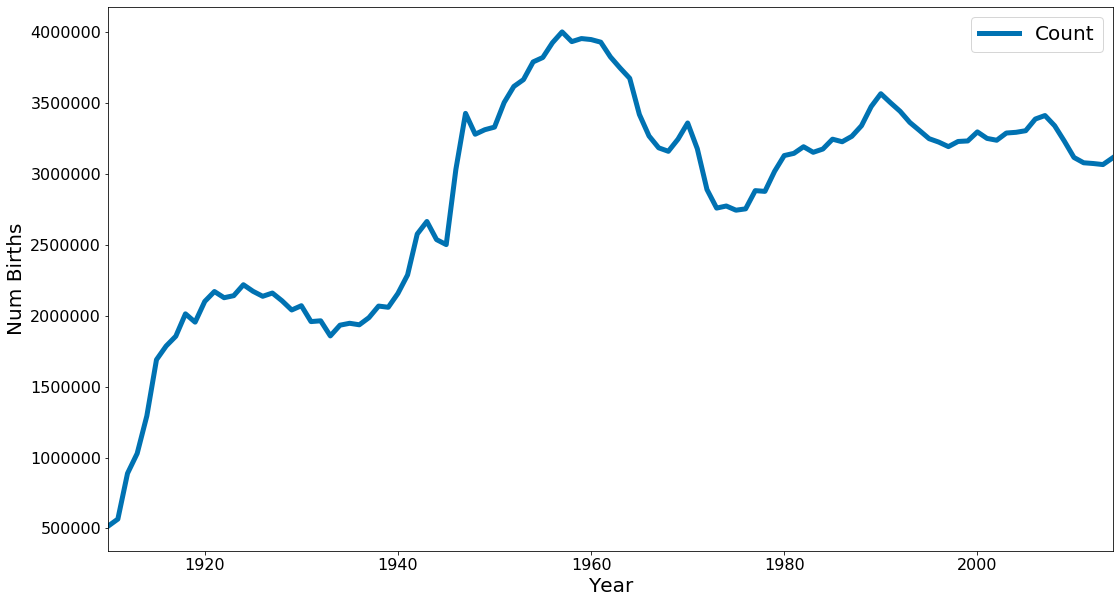

In [12]:
series.plot(figsize=(18, 10), fontsize=16, lw=5)
plt.xlabel('Year')
plt.ylabel('Num Births')

Pequena gambiarra abaixo, vou colocar cada ano no formato 1-1-ANO. Assim o pandas sabe criar uma data.

In [13]:
new_series = series.copy()
['1-1-{}'.format(str(x)) for x in new_series.index]

['1-1-1910',
 '1-1-1911',
 '1-1-1912',
 '1-1-1913',
 '1-1-1914',
 '1-1-1915',
 '1-1-1916',
 '1-1-1917',
 '1-1-1918',
 '1-1-1919',
 '1-1-1920',
 '1-1-1921',
 '1-1-1922',
 '1-1-1923',
 '1-1-1924',
 '1-1-1925',
 '1-1-1926',
 '1-1-1927',
 '1-1-1928',
 '1-1-1929',
 '1-1-1930',
 '1-1-1931',
 '1-1-1932',
 '1-1-1933',
 '1-1-1934',
 '1-1-1935',
 '1-1-1936',
 '1-1-1937',
 '1-1-1938',
 '1-1-1939',
 '1-1-1940',
 '1-1-1941',
 '1-1-1942',
 '1-1-1943',
 '1-1-1944',
 '1-1-1945',
 '1-1-1946',
 '1-1-1947',
 '1-1-1948',
 '1-1-1949',
 '1-1-1950',
 '1-1-1951',
 '1-1-1952',
 '1-1-1953',
 '1-1-1954',
 '1-1-1955',
 '1-1-1956',
 '1-1-1957',
 '1-1-1958',
 '1-1-1959',
 '1-1-1960',
 '1-1-1961',
 '1-1-1962',
 '1-1-1963',
 '1-1-1964',
 '1-1-1965',
 '1-1-1966',
 '1-1-1967',
 '1-1-1968',
 '1-1-1969',
 '1-1-1970',
 '1-1-1971',
 '1-1-1972',
 '1-1-1973',
 '1-1-1974',
 '1-1-1975',
 '1-1-1976',
 '1-1-1977',
 '1-1-1978',
 '1-1-1979',
 '1-1-1980',
 '1-1-1981',
 '1-1-1982',
 '1-1-1983',
 '1-1-1984',
 '1-1-1985',
 '1-1-1986',

Depois vou criar um novo índice

In [14]:
dates = pd.to_datetime(['15-6-{}'.format(str(x)) for x in new_series.index])
new_series.index = pd.DatetimeIndex(dates)
new_series

,Count
1910-06-15,516318
1911-06-15,565810
1912-06-15,887984
1913-06-15,1028553
1914-06-15,1293322
1915-06-15,1690022
1916-06-15,1786510
1917-06-15,1855696
1918-06-15,2013381
1919-06-15,1954834


In [15]:
new_series.resample('10Y').sum()

,Count
1910-12-31,516318
1920-12-31,15177269
1930-12-31,21345615
1940-12-31,19870213
1950-12-31,28952157
1960-12-31,38165483
1970-12-31,34817092
1980-12-31,29009332
1990-12-31,32787986
2000-12-31,33042354


Text(0.5, 0, '')

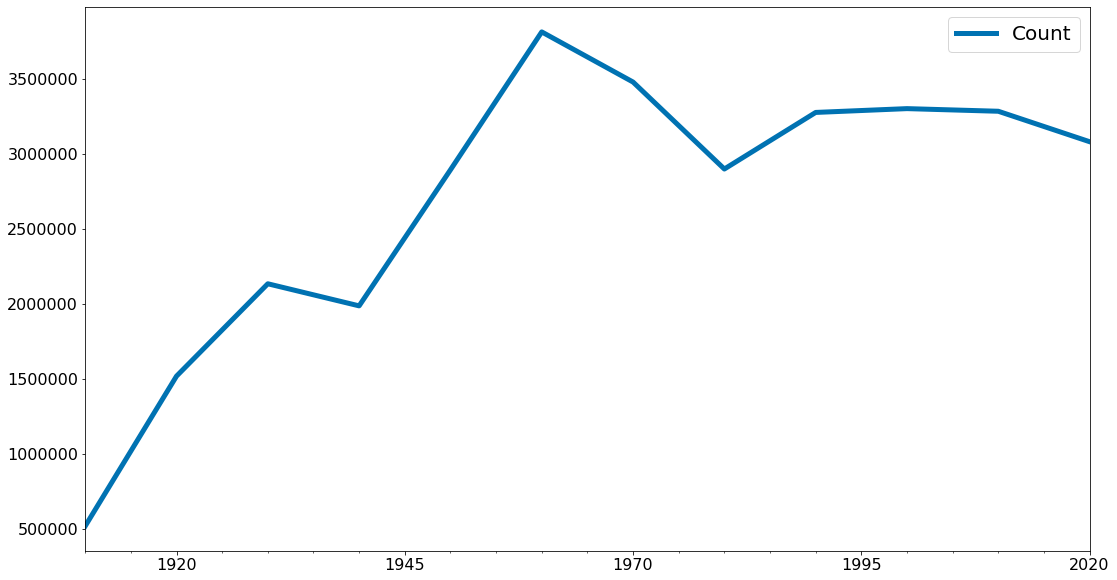

In [16]:
new_series.resample('10Y').mean().plot(figsize=(18, 10), fontsize=16, lw=5)
plt.xlabel('')

### matplotlib

Existe uma grande variedade de ferramentas para visualizar dados. 

Nós usaremos a biblioteca `matplotlib`, que é amplamente utilizada (embora mostre sua idade). 

Se você estiver interessado em produzir visualizações interativas elaboradas para a Web, provavelmente não é a escolha certa, mas para gráficos de barras simples, gráficos de linhas e diagramas de dispersão, funciona muito bem.

Em particular, estamos usando o módulo `matplotlib.pyplot`.

Em seu uso mais simples, o `pyplot` mantém um estado interno no qual você constrói uma visualização passo a passo. 

Quando terminar, você poderá salvá-lo (com `savefig()`) ou exibi-lo (com `show()`).

Vamos iniciar com duas listas simples de dados.

In [17]:
anos = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
pib = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

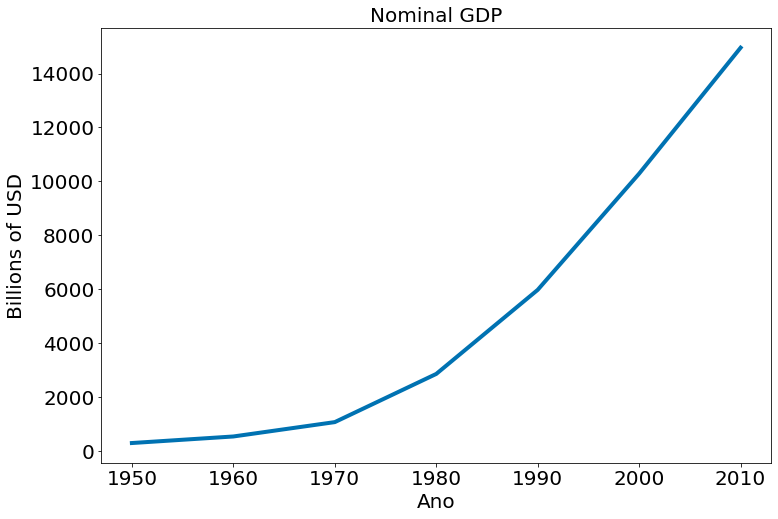

In [18]:
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(anos, pib)

# Adiciona um título
plt.title('Nominal GDP')

# Label nos eixos
plt.ylabel('Billions of USD')
plt.xlabel('Ano')

plt.show()

Podemos mudar a aparência usando estilos.

In [19]:
# comentado para não mudar, mas essa é chamada.
# plt.style.use('seaborn')

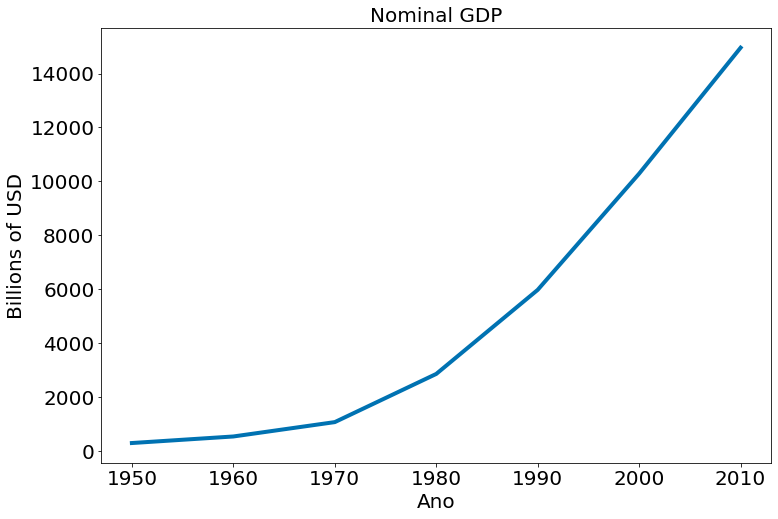

In [20]:
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(anos, pib)

# Adiciona um título
plt.title('Nominal GDP')

# Label nos eixos
plt.ylabel('Billions of USD')
plt.xlabel('Ano')

plt.show()

Em particular, eu acho bom usar os estilos colorblind. Ajudam a fazer artigos científicos e garantir que todos entendam eu plot.

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [22]:
# Voltando
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

Podemos também usar vetores numpy sem problemas

In [23]:
x = np.linspace(-100, 100, 100) * 0.1
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

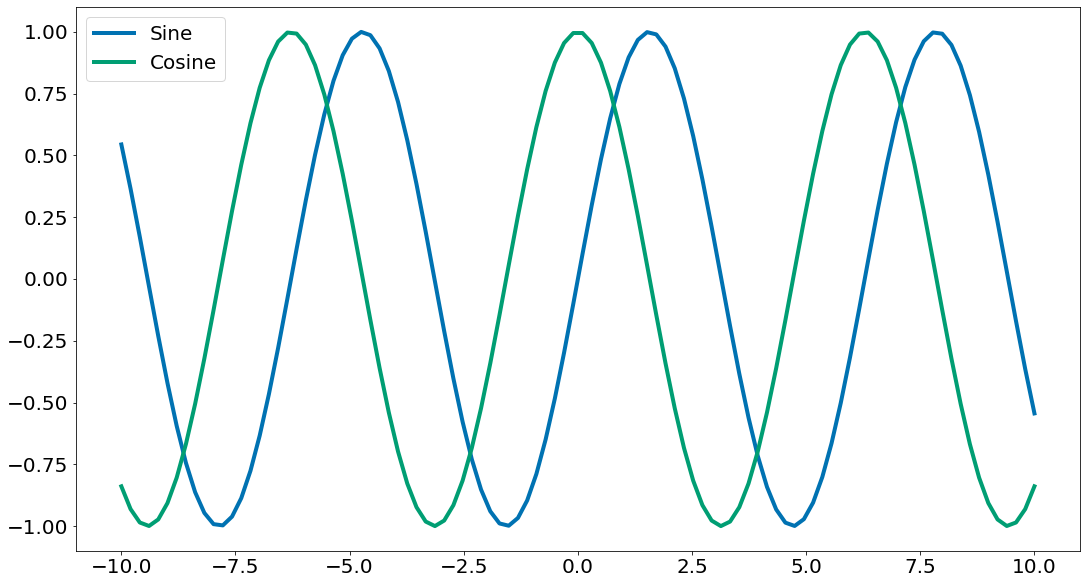

In [24]:
plt.figure(figsize=(18, 10))

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.legend()

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    

Text(0, 0.5, 'Cosine')

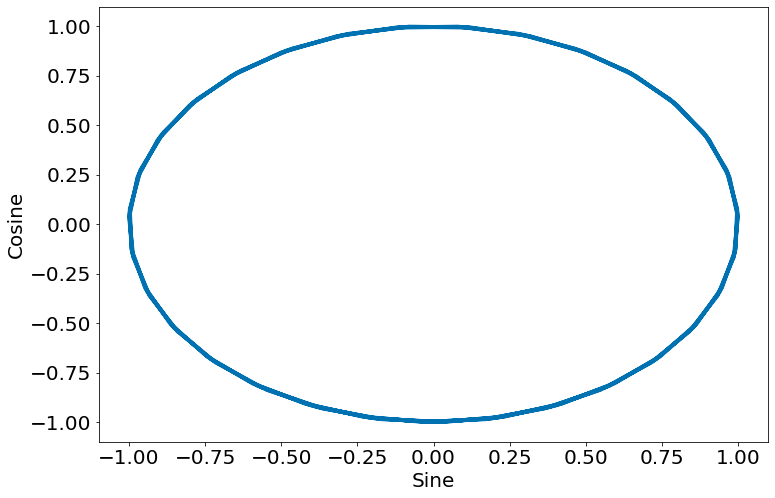

In [25]:
plt.plot(np.sin(x), np.cos(x))
plt.xlabel('Sine')
plt.ylabel('Cosine')

## Movies Dataset

Vamos olhar para mais ou menos 50 atores e algumas métricas dos filmes que os mesmos fazem parte. Em particular, vamos iniciar explorando uma forma de visualizar dados que é o histograma.

In [26]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/04-EDA-e-Vis/top_movies.csv', encoding='iso-8859-1', na_values='unknown')

In [27]:
df.head(6)

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008


In [28]:
mean_g = df.groupby('Studio').mean()['Gross (Adjusted)']

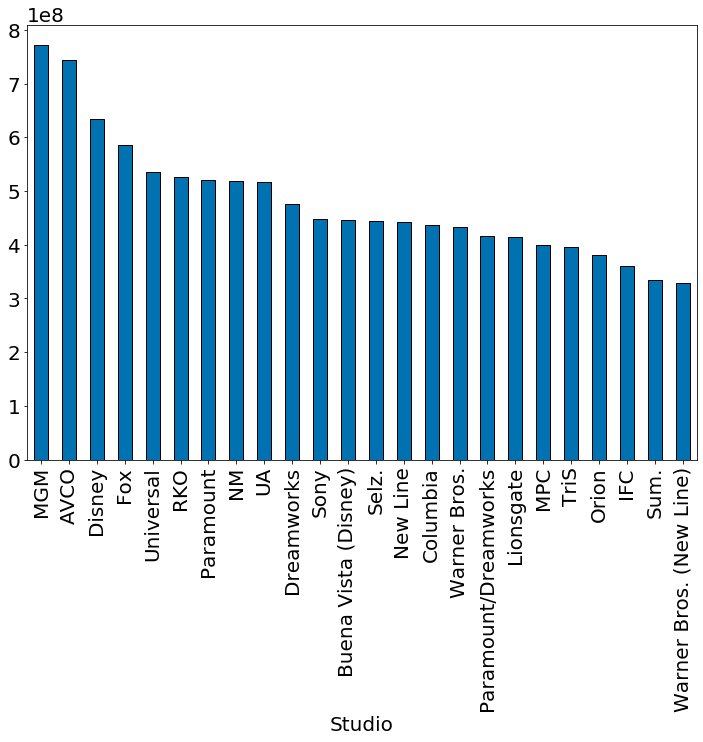

In [29]:
mean_g.sort_values()[::-1].plot.bar(edgecolor='k')

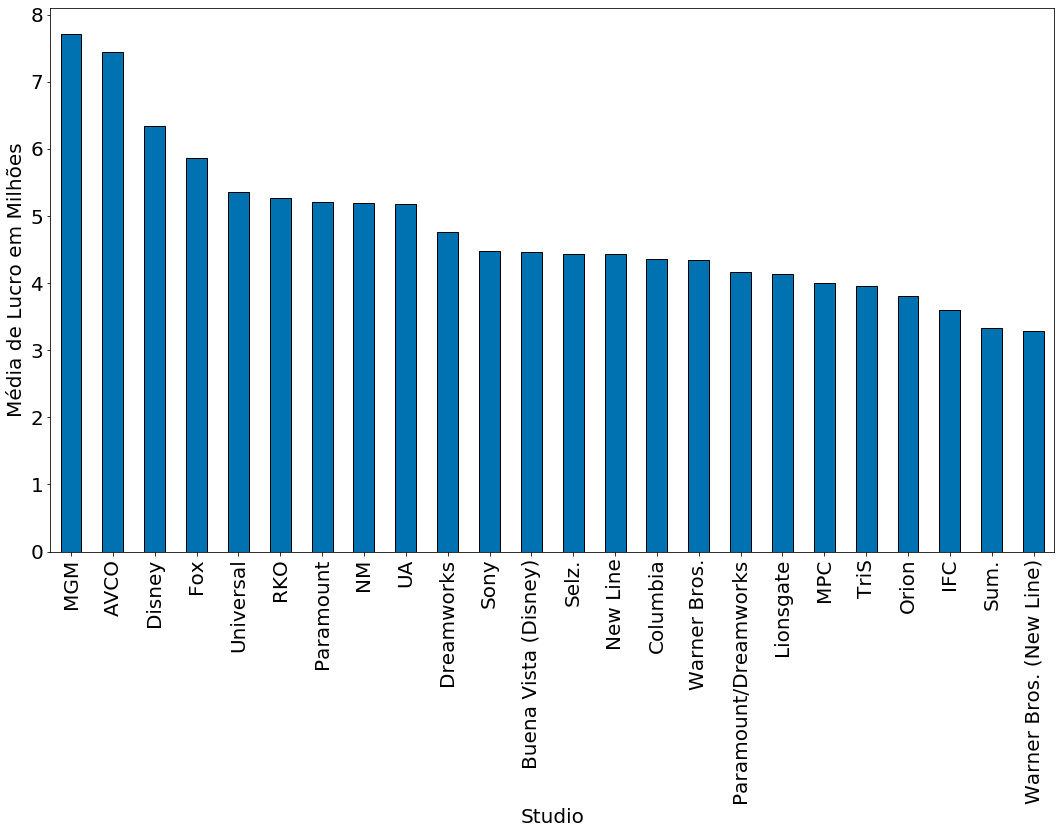

In [30]:
plt.figure(figsize=(18, 10))
mean_g = df.groupby('Studio').mean()['Gross (Adjusted)']
mean_g /= 1e8
ax = mean_g.sort_values()[::-1].plot.bar(fontsize=20, edgecolor='k')
plt.ylabel('Média de Lucro em Milhões')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

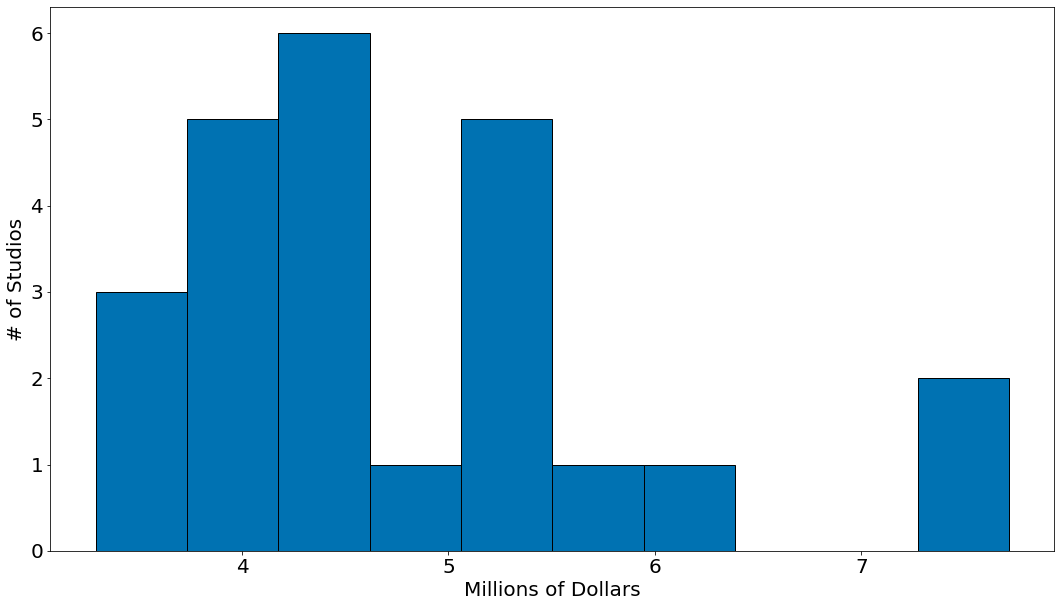

In [31]:
mean_g = df.groupby('Studio').mean()['Gross (Adjusted)']
mean_g /= 1e8
plt.figure(figsize=(18, 10))
plt.hist(mean_g, edgecolor='k')
plt.xlabel('Millions of Dollars')
plt.ylabel('# of Studios')

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## Base de actors

In [32]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/04-EDA-e-Vis/actors.csv', encoding='iso-8859-1', na_values='unknown')
df

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


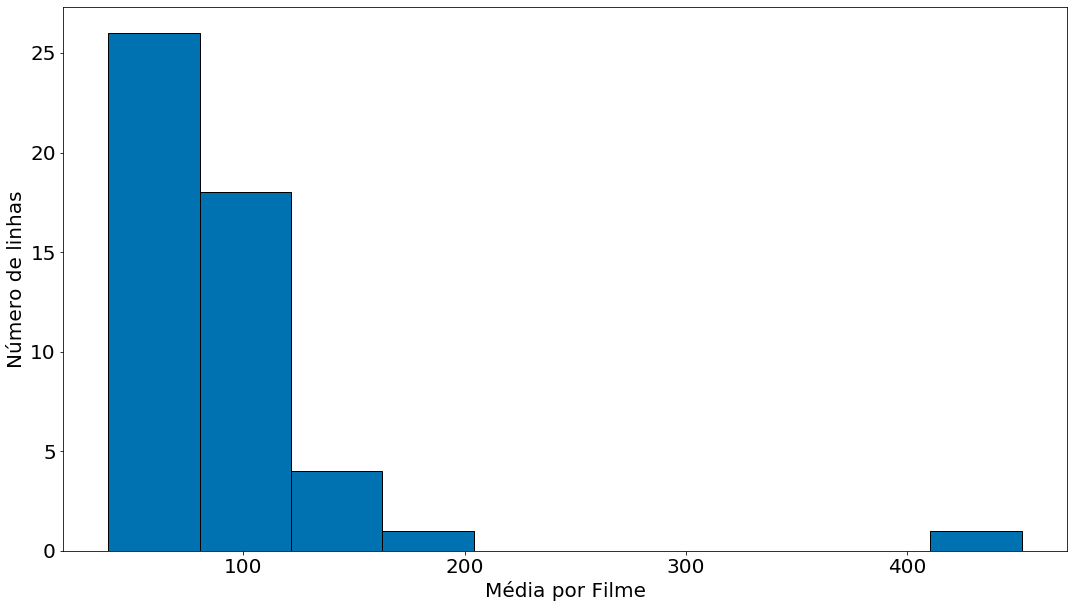

In [33]:
plt.figure(figsize=(18, 10))
plt.hist(df['Average per Movie'], edgecolor='k')
plt.xlabel('Média por Filme')
plt.ylabel('Número de linhas')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

Obtendo a densidade de pontos em cada barra. Note que isto nem sempre vai traduzir para um valor entre `[0, 1]`. Depende do eixo-x. 

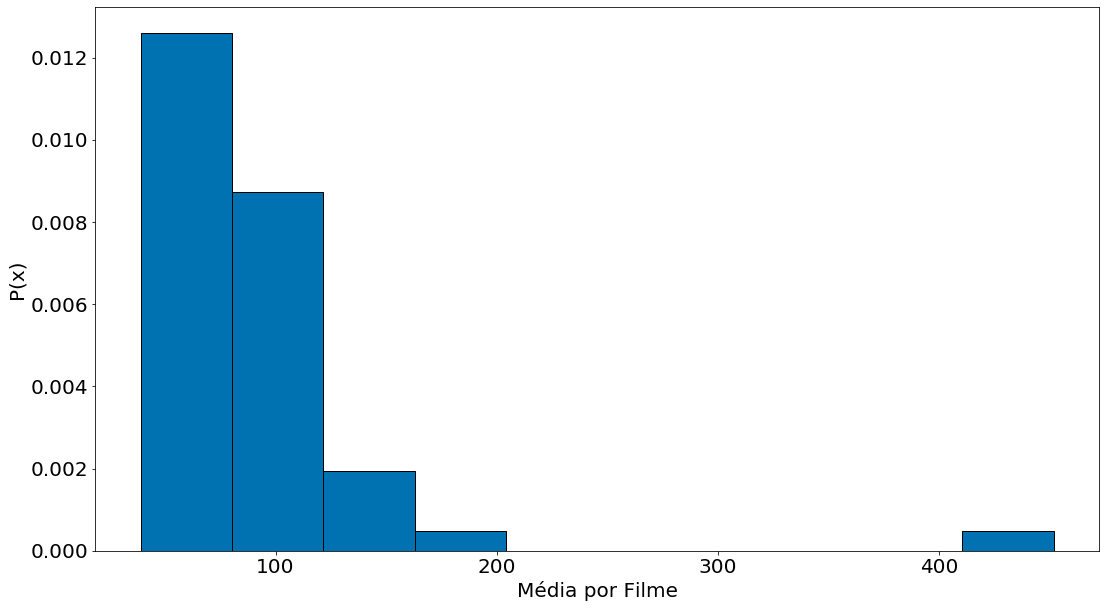

In [34]:
plt.figure(figsize=(18, 10))
plt.hist(df['Average per Movie'], density=True, edgecolor='k')
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

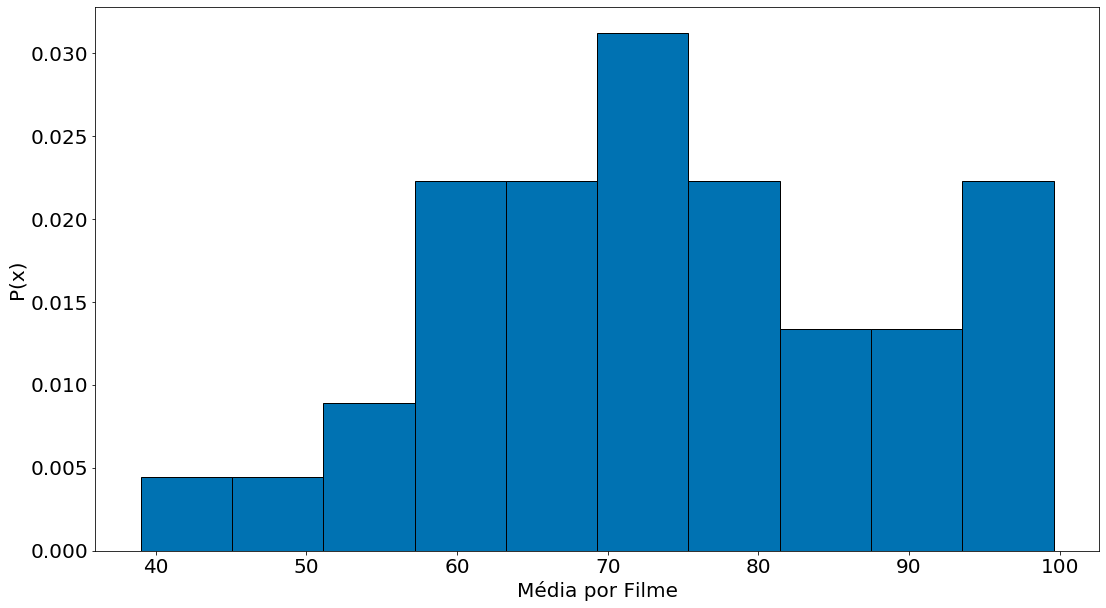

In [35]:
plt.figure(figsize=(18, 10))
data = df['Average per Movie'][df['Average per Movie'] < 100]
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
plt.hist(data, density=True, edgecolor='k')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

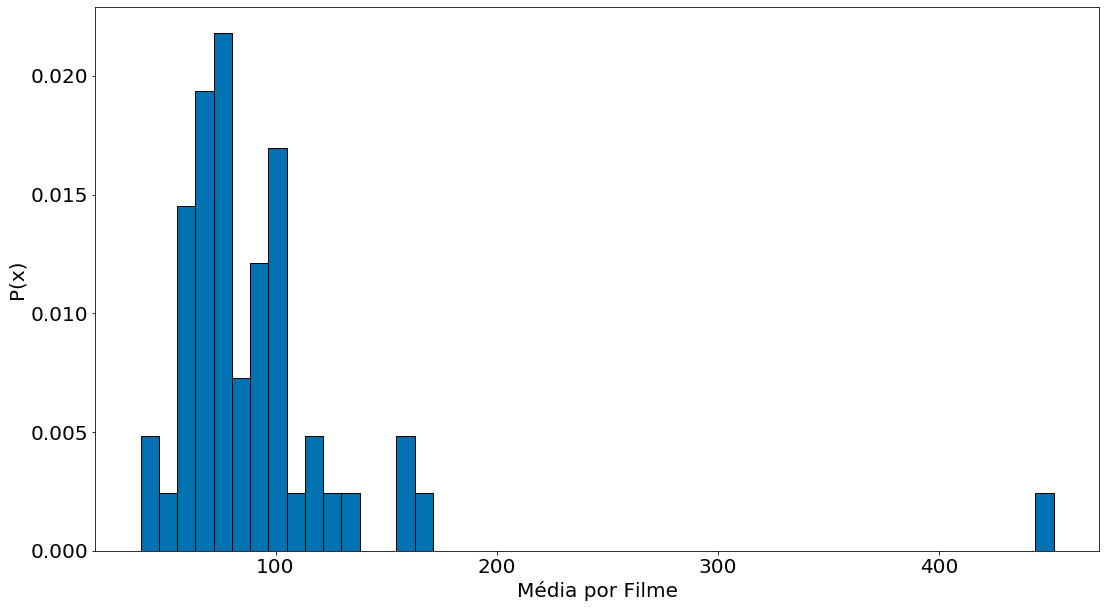

In [36]:
plt.figure(figsize=(18, 10))
data = df['Average per Movie']
plt.xlabel('Média por Filme')
plt.ylabel('P(x)')
plt.hist(data, density=True, bins=50, edgecolor='k')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Problemas de escala

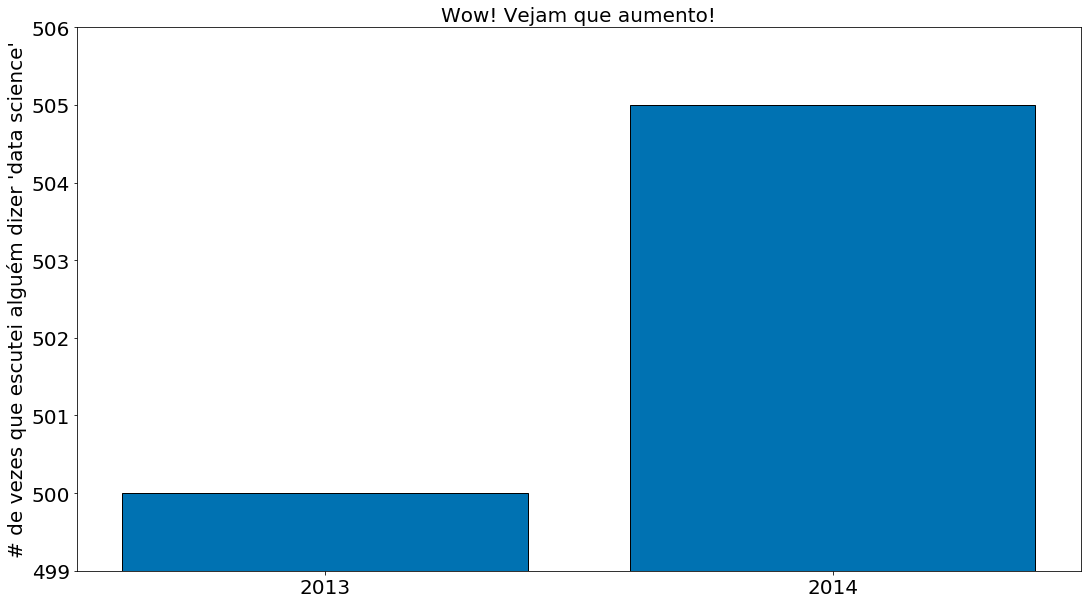

In [37]:
plt.figure(figsize=(18, 10))
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions, edgecolor='k')

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

# define o os limites do eixo y:
plt.ylim(499,506)

plt.title("Wow! Vejam que aumento!")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

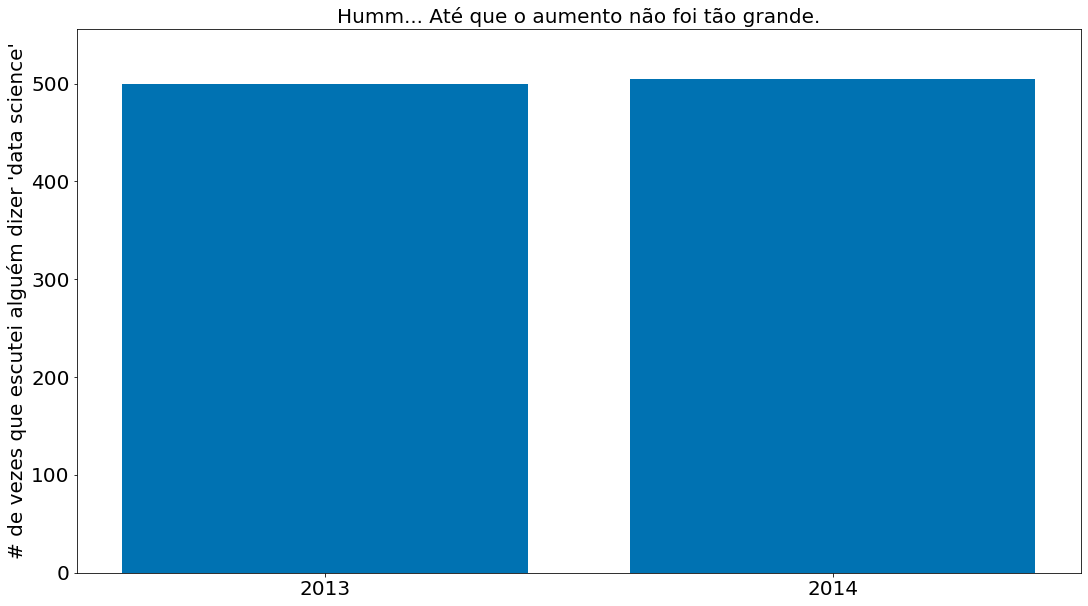

In [38]:
plt.figure(figsize=(18, 10))

plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# de vezes que escutei alguém dizer 'data science'")

plt.ylim(0, max(mentions)*1.1)
plt.title("Humm... Até que o aumento não foi tão grande.")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Dados 2d com e leitura de JSON

O pandas também sabe ler dados em json! Vamos tentar.

In [39]:
df = pd.read_json('capital.json')

In [40]:
df

,ano_dois,ano_um,cargo_pleiteado_1,cargo_pleiteado_2,cod_unidade_eleitoral_1,cod_unidade_eleitoral_2,cpf,estado,nome_urna,patrimonio_eleicao_1,patrimonio_eleicao_2,sequencial_candidato_1,sequencial_candidato_2,sigla_partido,situacao_eleicao_1,situacao_eleicao_2,unidade_eleitoral
0,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,MG,MG,1608657,MG,Stefano Aguiar,2326963.85,2890296.74,130000001189,130000613225,PSD,ELEITO,ELEITO,Minas Gerais
1,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,RJ,RJ,7487738,RJ,Altineu Cortes,4239563.82,3943907.61,190000001858,190000604181,PR,ELEITO,ELEITO,Rio De Janeiro
2,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,BA,BA,31226540,BA,Mário Negromonte Jr,1077668.74,2281417.64,50000000167,50000605225,PP,ELEITO,ELEITO,Bahia
3,2018,2014,VICE-GOVERNADOR,DEPUTADO FEDERAL,CE,CE,113735391,CE,Roberto Pessoa,14399524.97,13160762.14,60000000604,60000611570,PSDB,NÃO ELEITO,ELEITO,Ceará
4,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,SP,SP,168780860,SP,Vitor Lippi,713217.64,972916.79,250000001354,250000605413,PSDB,ELEITO,ELEITO,São Paulo
5,2018,2014,DEPUTADO ESTADUAL,DEPUTADO FEDERAL,RS,RS,213461005,RS,Fernanda Melchionna,106070.38,96319.25,210000000014,210000600043,PSOL,NÃO ELEITO,ELEITO,Rio Grande Do Sul
6,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,RJ,RJ,262905701,RJ,Pedro Paulo,553144.11,341805.65,190000001428,190000607425,DEM,ELEITO,ELEITO,Rio De Janeiro
7,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,MS,MS,263382893,MS,Dagoberto,2712509.62,3093645.23,120000000508,120000602218,PDT,ELEITO,ELEITO,Mato Grosso Do Sul
8,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,SP,SP,398099863,SP,Carlos Zarattini,600772.54,1051302.81,250000000618,250000623897,PT,ELEITO,ELEITO,São Paulo
9,2018,2014,DEPUTADO FEDERAL,DEPUTADO FEDERAL,MA,MA,441514383,MA,Rubens Junior,653912.76,801591.36,100000000627,100000601890,PC do B,ELEITO,ELEITO,Maranhão


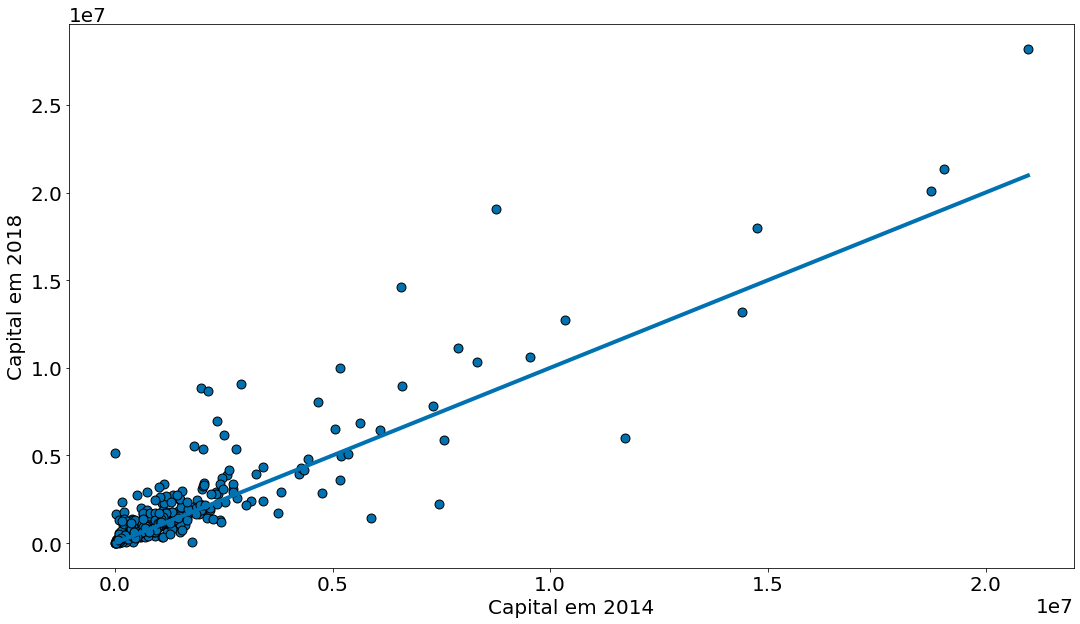

In [41]:
plt.figure(figsize=(18, 10))
plt.scatter(df['patrimonio_eleicao_1'], df['patrimonio_eleicao_2'], s=80, edgecolor='k')
linha45 = np.unique(df['patrimonio_eleicao_1'])
plt.plot(linha45, linha45)

plt.xlabel('Capital em 2014')
plt.ylabel('Capital em 2018')
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)